# Macaque Motor Cortex recordings

## 1. Firing Rate
Analyzing the responses of neuron unit #94 to direction 6 from 1 second before the go cue to 1 second afterward.

In [2]:
# load spiking models and analysis techniques
from compneuro import *

In [3]:
# read in the data
go_info = np.loadtxt('go.txt')
direction = np.loadtxt('direction.txt')
neuron94 = np.loadtxt('spike_trains/spike_train_unit_093.txt')

In [28]:
# find all the go cue timings where the direction is 6
indicies = np.where(direction == 6)
print(indicies[0].shape)
six_go_cues = go_info[indicies]
print(six_go_cues)

(24,)
[  45.287533  253.6178    539.259933  548.513667  552.603567  575.370933
  662.942533  667.3324    704.479367  768.6576    810.226467  820.688167
  828.885933  850.719333  892.2482    928.7672    943.784767  966.350167
 1099.5545   1145.277233 1164.5847   1176.920367 1226.197    1246.960433]


In [40]:
# find spiking times one second before the go cue to one second after
relative_spikes = []
for cue in six_go_cues:
    idxs = np.where(abs(neuron94 - cue) <= 1)
    relative_spikes.append(neuron94[idxs] - cue)
print(relative_spikes)

[array([-0.971366, -0.743066, -0.622533, -0.514133, -0.275366, -0.244833,
       -0.231   , -0.182   , -0.1621  , -0.136266, -0.0783  , -0.074766,
       -0.067033, -0.0482  ,  0.009867,  0.038034,  0.078934,  0.165167,
        0.177467,  0.2123  ,  0.231934,  0.275934,  0.336234,  0.401134,
        0.454734,  0.4806  ,  0.500134,  0.505834,  0.571767,  0.584834,
        0.592467,  0.686334,  0.8816  ,  0.903267,  0.978434]), array([-0.997533, -0.849633, -0.783533, -0.747767, -0.6021  , -0.5259  ,
       -0.4628  , -0.436533, -0.351867, -0.2855  , -0.272467, -0.198933,
       -0.063467, -0.060367, -0.022   ,  0.0315  ,  0.0914  ,  0.279267,
        0.402733,  0.470933,  0.518467,  0.5439  ,  0.615533,  0.630133,
        0.638733,  0.677767,  0.705533,  0.723233,  0.728133,  0.796567,
        0.8071  ,  0.8249  ,  0.840333,  0.845233,  0.8503  ,  0.864333,
        0.906133,  0.9157  ,  0.961333]), array([-0.904066, -0.8401  , -0.8293  , -0.772566, -0.7447  , -0.6575  ,
       -0.6139  ,

## a) Raster plot showing 1 second before and 1 second after go cue

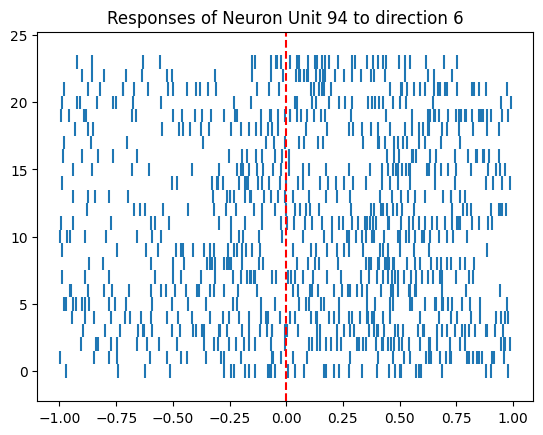

In [30]:
plt.eventplot(relative_spikes);
plt.axvline(x=0, color='red', linestyle='--', linewidth=1.5);
plt.title("Responses of Neuron Unit 94 to direction 6");

## b) Trial averaged spike count from the 2 second window centered at the go cue

In [36]:
totals = [len(x) for x in relative_spikes]
print(f"Trial-averaged spike count during the period [-1,1] sec relative to the go cue: {sum(totals)/len(totals)}")

Trial-averaged spike count during the period [-1,1] sec relative to the go cue: 38.5


## c) Peri-Stimulus Time histogram with 50 ms bin-size

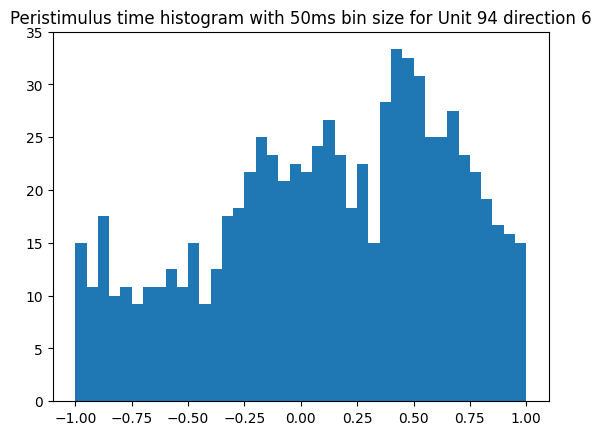

In [43]:
bin_centers, counts = psth(relative_spikes, 0.05, -1, 1)
plt.bar(bin_centers, counts, width=0.05);
plt.title("Peristimulus time histogram with 50ms bin size for Unit 94 direction 6");

## d) Using Gaussian filters of different widths to visualize a smooth function of firing rate over time

In [ ]:
# use scipy for the gaussian filter
from scipy.ndimage import gaussian_filter

In [ ]:
smooth5ms_spikes = [gaussian_filter(spike_train, 0.05) for spike_train in relative_spikes]
print(smooth5ms_spikes)
# I could np convolve with a gaussian or I could use scipy but would need to make a bin size for the resolution of the graph

[array([-0.971366, -0.743066, -0.622533, -0.514133, -0.275366, -0.244833,
       -0.231   , -0.182   , -0.1621  , -0.136266, -0.0783  , -0.074766,
       -0.067033, -0.0482  ,  0.009867,  0.038034,  0.078934,  0.165167,
        0.177467,  0.2123  ,  0.231934,  0.275934,  0.336234,  0.401134,
        0.454734,  0.4806  ,  0.500134,  0.505834,  0.571767,  0.584834,
        0.592467,  0.686334,  0.8816  ,  0.903267,  0.978434]), array([-0.997533, -0.849633, -0.783533, -0.747767, -0.6021  , -0.5259  ,
       -0.4628  , -0.436533, -0.351867, -0.2855  , -0.272467, -0.198933,
       -0.063467, -0.060367, -0.022   ,  0.0315  ,  0.0914  ,  0.279267,
        0.402733,  0.470933,  0.518467,  0.5439  ,  0.615533,  0.630133,
        0.638733,  0.677767,  0.705533,  0.723233,  0.728133,  0.796567,
        0.8071  ,  0.8249  ,  0.840333,  0.845233,  0.8503  ,  0.864333,
        0.906133,  0.9157  ,  0.961333]), array([-0.904066, -0.8401  , -0.8293  , -0.772566, -0.7447  , -0.6575  ,
       -0.6139  ,

In [10]:
print(len(go_info))
print(len(direction))
print(len(neuron94))

158
158
20458
